In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import log_loss

In [39]:
heart = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Heart Attack\heart.csv")

In [40]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
x = Vehicle.drop("output", axis=1)
y = Vehicle["output"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2022, test_size = 0.3)

In [43]:
dtc = DecisionTreeClassifier( random_state = 2022, max_depth = 4)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_prob = dtc.predict_proba(x_test)[:,1]

plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names = x.columns, class_names=["0","1"], fontsize=14)
plt.show()

In [44]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.7582417582417582
0.7790697674418605


In [45]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
dtc = DecisionTreeClassifier(random_state = 2022)
params = {"max_depth" : [2,3,4,5,None],
          "min_samples_split" : [2,5,10],
          "min_samples_split" : [1,5,10]}
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ..max_depth=2, min_samples_split=5;, score=0.707 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_split=5;, score=0.799 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_split=5;, score=0.796 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_split=5;, score=0.916 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_split=5;, score=0.788 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=10;, score=0.707 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=10;

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [1, 5, 10]},
             scoring='roc_auc', verbose=3)

In [46]:
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_

{'max_depth': 3, 'min_samples_split': 5}
0.8277457110790444


[0.04392225 0.         0.49985321 0.01505751 0.         0.
 0.         0.04297948 0.         0.         0.         0.18657214
 0.21161541]


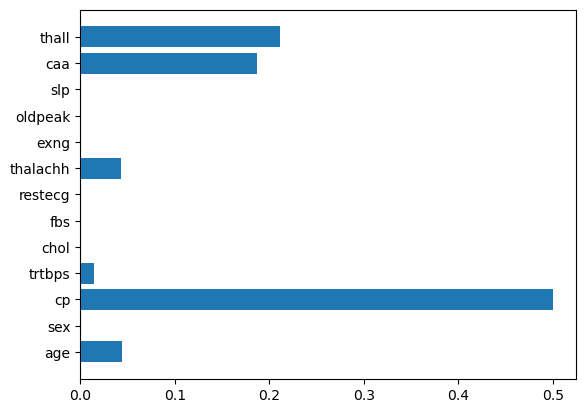

In [47]:
print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(x.columns, imps)
plt.show()